# Data augmentation


We start with PIL transforms to resize all our images to the same size. 
Then we can apply extra data augmentations

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
from torch import *

#let me be on my mac
def cuda(self, device=None, non_blocking=False) : return self
torch.Tensor.cuda = cuda

In [3]:
from lib.callbacks import *
from lib.model import *
from lib.data import *
from lib.optimizers import *
from pathlib import Path

## Data

In [4]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE)

### View images at full size

image.shape:(1162, 773)


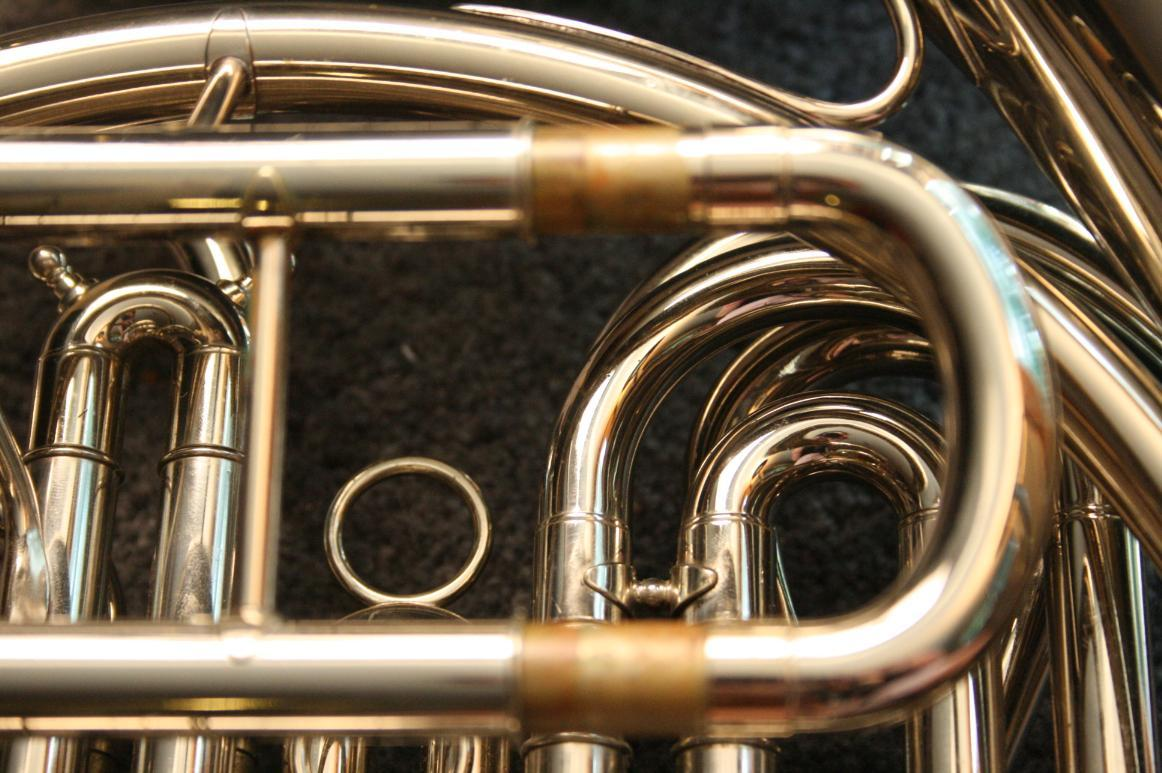

In [16]:

#read and show image full size
make_rgb._order=0
tfms = [make_rgb, to_byte_tensor, to_float_tensor]
il   = ImageList.from_files(path, tfms=tfms)
img  = PIL.Image.open(il.items[0])
print(f"image.shape:{img.size}")
img

## What is the resizing method that best preserve basic patterns 

Be careful of resampling methods, you can quickly lose some textures!

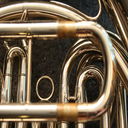

In [6]:
img.resize((128,128), resample=PIL.Image.ANTIALIAS)

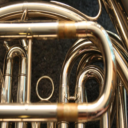

In [7]:
img.resize((128,128), resample=PIL.Image.BILINEAR)

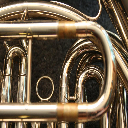

In [8]:
img.resize((128,128), resample=PIL.Image.NEAREST)

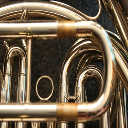

In [9]:
img.resize((256,256), resample=PIL.Image.BICUBIC).resize((128,128), resample=PIL.Image.NEAREST)

## Read and scale the shortes side of the image

ResizeFixed:size:{self.size}
image.shape:torch.Size([3, 32, 32])
ResizeFixed:size:{self.size}


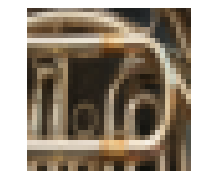

In [21]:
tfms = [make_rgb, ResizeFixed(32), to_byte_tensor, to_float_tensor]
il   = ImageList.from_files(path, tfms=tfms)
print(f"image.shape:{il[0].shape}")
show_image(il[0])

### Center crop
rescales the image and zoom into the center according to the scale factor

image.shape:torch.Size([3, 128, 128])


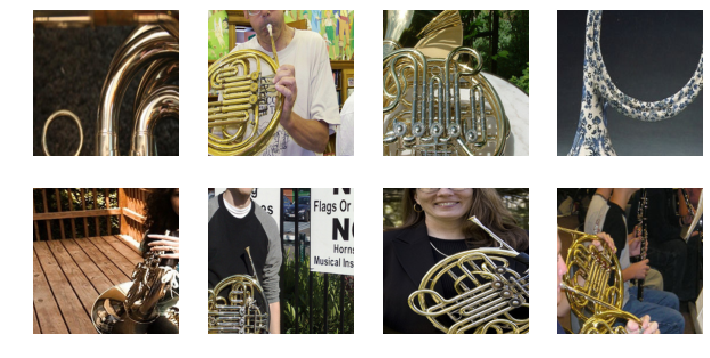

In [73]:
tfms = [make_rgb, CenterCrop(128,scale=2), to_byte_tensor, to_float_tensor]
il   = ImageList.from_files(path, tfms=tfms)
print(f"image.shape:{il[0].shape}")
show_batch( next(iter(DataLoader(il,8))) )

### RandomResizeCrop

image.shape:torch.Size([3, 128, 128])


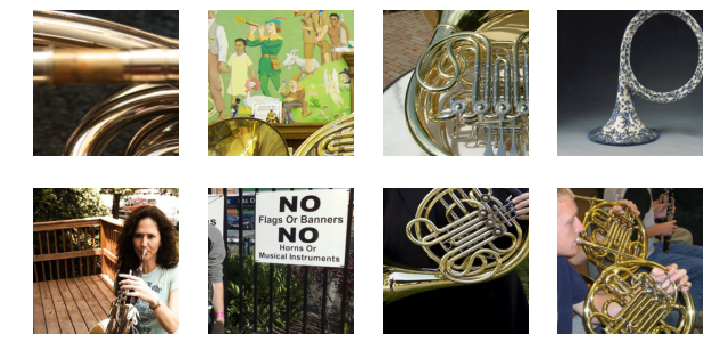

In [74]:
tfms = [make_rgb, RandomResizedCrop(128), to_byte_tensor, to_float_tensor]
il   = ImageList.from_files(path, tfms=tfms)
print(f"image.shape:{il[0].shape}")
show_batch( next(iter(DataLoader(il,8))) )

### Dihedral transforms
flip the image sideways, vertical, on the diagonals

In [87]:
PIL.Image.FLIP_LEFT_RIGHT, PIL.Image.FLIP_TOP_BOTTOM, PIL.Image.ROTATE_90, PIL.Image.ROTATE_180, \
PIL.Image.ROTATE_270, PIL.Image.TRANSPOSE, PIL.Image.TRANSVERSE

(0, 1, 2, 3, 4, 5, 6)

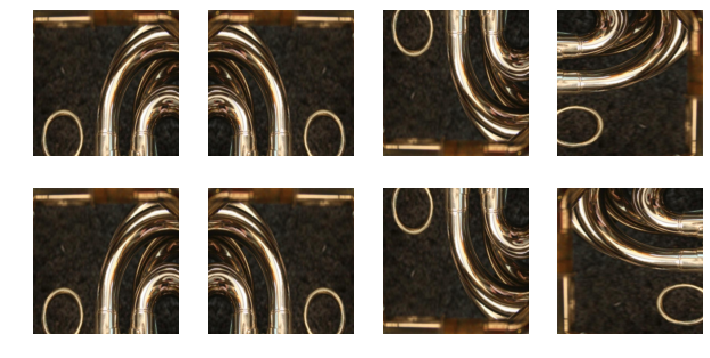

In [88]:
tfms = [make_rgb, CenterCrop(128,2), PilRandomDihedral(), to_byte_tensor, to_float_tensor]
imgs = ImageList.from_files(path, tfms=tfms)
imgs.items = [imgs.items[0]]*8
show_batch( next(iter(DataLoader(imgs,8))) )